In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('pone.0212445.s004.xlsx')
 
data.head()

,"S4 Table. Direct survey domain and ""Fay-Heriott"" small area estimates of HIV prevalence and the numbers of people living with HIV (NoPLHIV) in the districts of South Africa obtained from Model 3. LCL and UCL denotes the lower and upper limits, respectively, of 95% confidence intervals.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
1,Buffalo City,BUF,Survey,13.6,10.268,16.932,102437,77340,127534
2,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
3,City of Cape Town,CPT,Survey,5.2,3.044,7.356,200751,117517,283985
4,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548


In [4]:
data.shape

(105, 9)

In [5]:
data.columns = data.iloc[0]
df = data[1:].reset_index(drop=True)
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.6,10.268,16.932,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.2,3.044,7.356,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.7,0,5.444,11302,0,22789


#### What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?

In [6]:
# Filter and calculate the sum
sum_no_plhiv_survey = df.loc[df['Estimate'] == 'Survey', 'NoPLHIV'].sum()
print(sum_no_plhiv_survey)

6409903


#### What is the average NoPLHIV of the two estimates used for “Xhariep”?

In [7]:
# Filter and calculate the average
average_no_plhiv_Xhariep = df.loc[df['District'] == 'Xhariep', 'NoPLHIV'].mean()
print(average_no_plhiv_Xhariep)

12247.5


#### Add a column and populate it with the number of people not living with HIV for each row. 

In [8]:
# Add a new column for the number of people not living with HIV
df['NoPNotLHIV'] = df['NoPLHIV'] * (100 - df['Prevalence_%']) / df['Prevalence_%']

In [9]:
# Change the data type of the "NoNotPLHIV" column to integer
df['NoPNotLHIV'] = df['NoPNotLHIV'].astype(int)
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoPNotLHIV
0,Buffalo City,BUF,Survey,13.6,10.268,16.932,102437,77340,127534,650776
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,651516
2,City of Cape Town,CPT,Survey,5.2,3.044,7.356,200751,117517,283985,3659845
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3628178
4,West Coast,DC1,Survey,2.7,0,5.444,11302,0,22789,407290


#### What is the total NoPLHIV in all the cities (districts with “city” or “metro” in the name)? 

In [10]:
# Filter districts with "city" or "metro" in the name and calculate the total NoPLHIV using both survey & Fay-Heriott estimates
sum_no_plhiv_city_metro = df[df['District'].str.contains('city|metro', case=False)]['NoPLHIV'].sum()
print(sum_no_plhiv_city_metro)

2572733


#### Remove all the special/non-alphabetic characters from the dataframe column names. Print the resultant field names output. 

In [11]:
# Remove special/non-alphabetic characters from column names
df.columns = df.columns.str.replace('[^a-zA-Z]', '')
df.head()

C:\Users\DELL\AppData\Local\Temp/ipykernel_14704/3883573343.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z]', '')


,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,NoPNotLHIV
0,Buffalo City,BUF,Survey,13.6,10.268,16.932,102437,77340,127534,650776
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,651516
2,City of Cape Town,CPT,Survey,5.2,3.044,7.356,200751,117517,283985,3659845
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3628178
4,West Coast,DC1,Survey,2.7,0,5.444,11302,0,22789,407290


#### Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) for Districts that end in “i”; according to Fay-Herriott estimates on 1 graph.

In [12]:
# Filter districts that end in "i"
filtered_df = df[df['District'].str.endswith('i')]
filtered_df.head()

,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,NoPNotLHIV
10,Chris Hani,DC13,Survey,14.3,10.184,18.416,114849,81792,147906,688290
11,Chris Hani,DC13,Fay-Heriott,14.080983,11.18122,17.583893,113090,89801,141224,690049
12,Joe Gqabi,DC14,Survey,10.7,7.956,13.444,37766,28081,47451,315187
13,Joe Gqabi,DC14,Fay-Heriott,11.507804,9.291766,14.169794,40618,32796,50013,312342
24,Fezile Dabi,DC20,Survey,9,6.256,11.744,45550,31662,59438,460561


In [13]:
filtered_df_Fay_Heriott = filtered_df.loc[filtered_df['Estimate'] == 'Fay-Heriott']
filtered_df_Fay_Heriott.head()

,District,Code,Estimate,Prevalence,PrevalenceLCL,PrevalenceUCL,NoPLHIV,NoPLHIVLCL,NoPLHIVUCL,NoPNotLHIV
11,Chris Hani,DC13,Fay-Heriott,14.080983,11.18122,17.583893,113090,89801,141224,690049
13,Joe Gqabi,DC14,Fay-Heriott,11.507804,9.291766,14.169794,40618,32796,50013,312342
25,Fezile Dabi,DC20,Fay-Heriott,10.030754,7.811309,12.793304,50767,39534,64748,455346
33,uMzinyathi,DC24,Fay-Heriott,18.097578,16.845087,19.421445,93061,86620,99868,421156
51,Ehlanzeni,DC32,Fay-Heriott,15.82096,12.012425,20.554906,271179,205899,352321,1442869


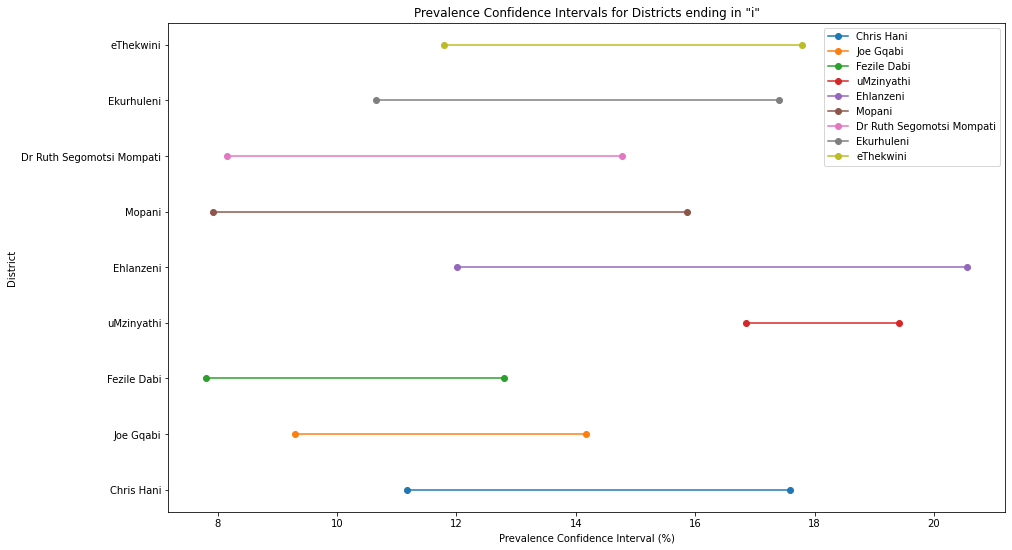

In [14]:
# Plot the confidence intervals for each district
plt.figure(figsize=(15,9))

for index, row in filtered_df_Fay_Heriott.iterrows():
    district_name = row['District']
    prevalence_ucl = row['PrevalenceUCL']
    prevalence_lcl = row['PrevalenceLCL']

    plt.plot([prevalence_lcl, prevalence_ucl], [district_name, district_name], marker='o', label=district_name)
    
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(2.0, 1), loc='upper left')

plt.title('Prevalence Confidence Intervals for Districts ending in "i"')
plt.xlabel('Prevalence Confidence Interval (%)')
plt.ylabel('District')
plt.legend()
plt.show()

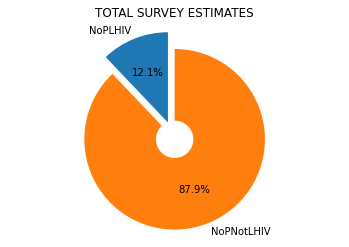

In [20]:
# Calculate total NoPLHIV and NoPNotLHIV for survey estimates
sum_no_plhiv_survey = df.loc[df['Estimate'] == 'Survey', 'NoPLHIV'].sum()
sum_no_pnotlhiv_survey = df.loc[df['Estimate'] == 'Survey', 'NoPNotLHIV'].sum()

# Create a break-away pie chart
explode = [0.2, 0]
labels = ['NoPLHIV', 'NoPNotLHIV']

fig, ax = plt.subplots()

# Outer circle (complete pie)
ax.pie([sum_no_plhiv_survey, sum_no_pnotlhiv_survey], labels=labels, autopct='%1.1f%%', startangle=90, explode=explode)

# Inner circle (blank center)
centre_circle = plt.Circle((0, 0), 0.2, color='white', linewidth=1.25)
ax.add_patch(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Set the title
plt.title('TOTAL SURVEY ESTIMATES')

# Display the chart
plt.show()


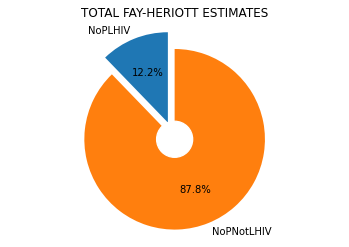

In [21]:
# Calculate total NoPLHIV and NoPNotLHIV for Fay-Heriott estimates
sum_no_plhiv_Fay_Heriott = df.loc[df['Estimate'] == 'Fay-Heriott', 'NoPLHIV'].sum()
sum_no_pnotlhiv_Fay_Heriott = df.loc[df['Estimate'] == 'Fay-Heriott', 'NoPNotLHIV'].sum()

# Create a break-away pie chart
explode = [0.2, 0]
labels = ['NoPLHIV', 'NoPNotLHIV']

fig, ax = plt.subplots()

# Outer circle (complete pie)
ax.pie([sum_no_plhiv_Fay_Heriott, sum_no_pnotlhiv_Fay_Heriott], labels=labels, autopct='%1.1f%%', startangle=90, explode=explode)

# Inner circle (blank center)
centre_circle = plt.Circle((0, 0), 0.2, color='white', linewidth=1.25)
ax.add_patch(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Set the title
plt.title('TOTAL FAY-HERIOTT ESTIMATES')

# Display the chart
plt.show()

##### By Gugu Mtonjeni Duration = 3hrs